<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/NLP_005(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#8k Subwords TOken
imdb, info=tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXLD6B/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXLD6B/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteWXLD6B/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [10]:
encoder=info.features["text"].encoder
encoder.vocab_size

8185

In [11]:
model=tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size, 16),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=16)),
                           tf.keras.layers.Dense(units=6, activation="relu"),
                           tf.keras.layers.Dense(units=1, activation="sigmoid")])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [16]:
training=imdb["train"]
training=training.shuffle(10000)
training=training.padded_batch(256)

test=imdb["train"]
test=test.padded_batch(256)

In [17]:
history=model.fit(training, epochs=10, verbose=2, validation_data=test)

Epoch 1/10
98/98 - 46s - loss: 0.6571 - accuracy: 0.6058 - val_loss: 0.5114 - val_accuracy: 0.7742 - 46s/epoch - 467ms/step
Epoch 2/10
98/98 - 29s - loss: 0.4478 - accuracy: 0.8109 - val_loss: 0.3385 - val_accuracy: 0.8736 - 29s/epoch - 294ms/step
Epoch 3/10
98/98 - 35s - loss: 0.3435 - accuracy: 0.8662 - val_loss: 0.2768 - val_accuracy: 0.9037 - 35s/epoch - 353ms/step
Epoch 4/10
98/98 - 33s - loss: 0.3144 - accuracy: 0.8818 - val_loss: 0.2403 - val_accuracy: 0.9189 - 33s/epoch - 340ms/step
Epoch 5/10
98/98 - 20s - loss: 0.2478 - accuracy: 0.9122 - val_loss: 0.2021 - val_accuracy: 0.9352 - 20s/epoch - 205ms/step
Epoch 6/10
98/98 - 14s - loss: 0.2070 - accuracy: 0.9305 - val_loss: 0.1713 - val_accuracy: 0.9456 - 14s/epoch - 143ms/step
Epoch 7/10
98/98 - 19s - loss: 0.2151 - accuracy: 0.9240 - val_loss: 0.1579 - val_accuracy: 0.9524 - 19s/epoch - 197ms/step
Epoch 8/10
98/98 - 19s - loss: 0.1678 - accuracy: 0.9462 - val_loss: 0.1515 - val_accuracy: 0.9528 - 19s/epoch - 191ms/step
Epoch 9/

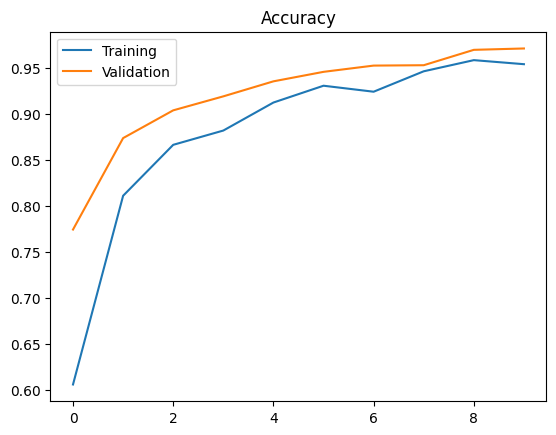

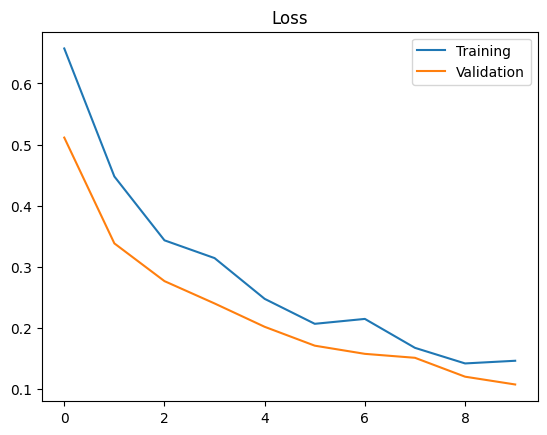

In [19]:
acc=history.history["accuracy"]
loss=history.history["loss"]

val_acc=history.history["val_accuracy"]
val_loss=history.history["val_loss"]

epochs=range(0,len(acc))

plt.title("Accuracy")
plt.plot(epochs, acc, label="Training")
plt.plot(epochs, val_acc, label="Validation")
plt.legend()

plt.figure()

plt.title("Loss")
plt.plot(epochs, loss, label="Training")
plt.plot(epochs, val_loss, label="Validation")
plt.legend()